In [1]:
import numpy as np

In [25]:
import numpy as np

class Perceptron:

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        print(X.shape)
        self.b_ = np.float_(0.)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [7]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: 0, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: 1, Length: 150, dtype: float64
0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: 2, Length: 150, dtype: float64
0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: 3, Length: 150, dtype: float64
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, Length: 150, dtype: object


KeyError: 5

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.1 1.5]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

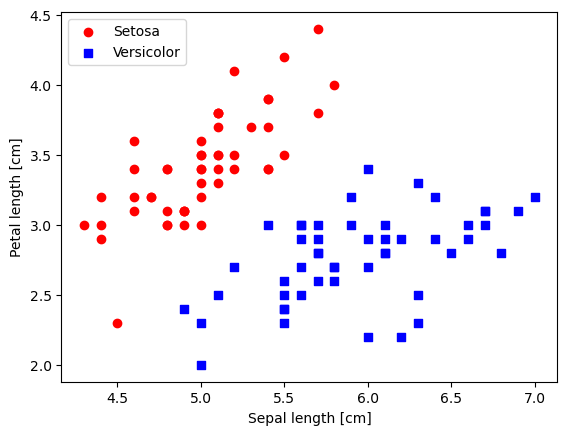

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

(100, 2)


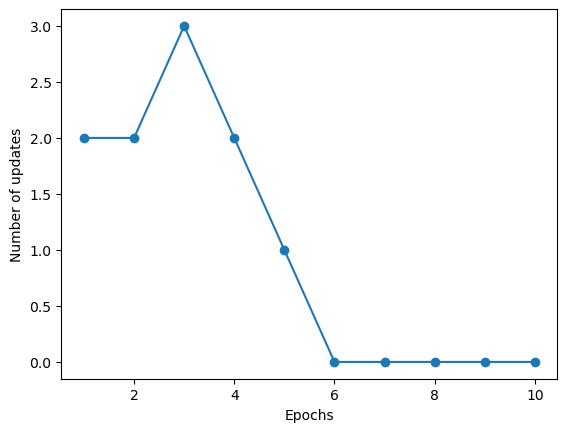

In [28]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [30]:
class test:
    def __init__(self):
        self.a = 1
        self.b = 2
    def predict(self):
        print(self.a)
        print(self.b)
    def help(self, func):
        func()
help(test.predict)

Help on function predict in module __main__:

predict(self)
